# Lab 2 : Decision Trees, Forests and Logistic Regression

---


Total Points: **50**

Tentative Weightage : **5%**

Submission Deadline :  **5th March 2021, 23:59 hours**

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x or PyTorch**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **inferences** (preferably in a text block) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. In case of any queries regarding Lab 2, please mail 2017csz0005@iitrpr.ac.in


# Dataset

###About the Dataset
A malware classifier dataset built with header fields’ values of portable executable files. You can read more about the dataset [here](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 


###Tasks on Dataset Exploration


---


Total for this subsection : **5 points**


---


1. Download and extract the 'Malwares' dataset from this [link](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 
2. Take a look at the downloaded dataset and explore the various columns/headers present in the dataset. **Note: You are to use the *raw* file throughout this assignment and not the intergrated* one**.   
3. Load the dataset using the pandas library. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). (**1 point**)
4. Report the total number of samples and the total number of columns in the dataset. (**1 point**)
5. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. (**1 point**)
6. Plot a bar chart showing the number of samples with the malware present and not present. (**1 point**)
7. Split the dataset into Train and Test sets in a 80:20 ratio. (**1 point**)

In [120]:
# Perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [121]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

Mounted at /content/MyDrive


In [122]:
# Please provide the path where ClaMP_Raw-5184.csv has been stored 
csv_file_path = "/content/MyDrive/MyDrive/ClaMP_Raw-5184.csv"

In [123]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here
df_without_na = pd.read_csv(csv_file_path)

In [124]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here
instances, attributes = df_without_na.shape
print("No. of instances = " + str(instances))
print("No. of attributes = " + str(attributes))

No. of instances = 5184
No. of attributes = 56


In [125]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here
df = df_without_na.dropna(axis=1)

In [126]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here
print("New number of instances = " + str(df.shape[0]))
print("New number of attributes = " + str(df.shape[1]))

New number of instances = 5184
New number of attributes = 54


<BarContainer object of 2 artists>

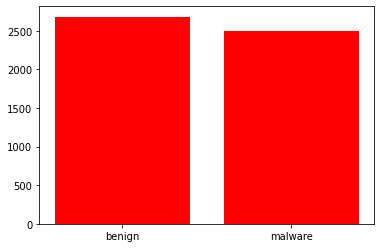

In [127]:
# Plot a bar chart showing the number of samples with the malware present and not present (1 point)
# Please insert your code here
ls = ["benign", "malware"]
freq = df['class'].value_counts().to_list()
plt.bar(ls, freq, color='red')

In [128]:
#Split the dataset into Train and Test sets in a 80:20 ratio (1 point)
# Please insert your code here
train_df, test_df = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=True)

# Visualizing a Decision Tree


---
Total for this subsection : **3 points**


---



Learn a decision tree classifier which accomodates at least 1000 samples per leaf node based on the train set. Note that this constraint on number of samples per leaf node is set so that the learned tree can be visualized. The tree learned may not be an optimal. Visualize the decision tree learned with such a constraint.

[Text(200.88000000000002, 181.2, 'X[33] <= 6422528.0\ngini = 0.499\nsamples = 4147\nvalue = [1990, 2157]'),
 Text(133.92000000000002, 108.72, 'X[46] <= 1184.0\ngini = 0.428\nsamples = 2957\nvalue = [916, 2041]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.198\nsamples = 1824\nvalue = [203, 1621]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.467\nsamples = 1133\nvalue = [713, 420]'),
 Text(267.84000000000003, 108.72, 'gini = 0.176\nsamples = 1190\nvalue = [1074, 116]')]

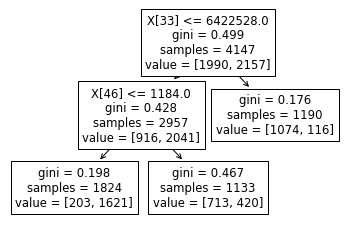

In [129]:
# Please insert your code here
# Step 1: Create a decision tree classifier with atleast 1000 samples per leaf node (1 point)
tr = tree.DecisionTreeClassifier(min_samples_leaf=1000)
# Step 2 : Learn the decision tree using the train set (1 point)
tr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
# Step 3 : Plot the decision tree learned (1 point)
tree.plot_tree(tr)

# Generating plots
Complete the following function that shall be reused to generate line plots in subsequent sections with approporiate labels in the legend and titles.

---
Total for this subsection : **2 points**

---





In [130]:
def generate_line_plots(xlist1, xlist2, ylist1, ylist2, legend1, legend2, given_title, x_label, y_label):
    """
    xlist1 : the list of values that form x axis in first plot
    ylist1 : the list of values that form y axis in first plot
    xlist2 : the list of values that form x axis in second plot
    ylist2 : the list of values that form y axis in second plot
    legend1 : label corresponding to first plot that will appear as its legend
    legend2 : label corresponding to second plot that will appear as its legend
    given_title : title for the plots
    x_label : x label for the plots
    y_label : y label for the plots
    """
    # Please feel free to add additional parameters to the function definition as necessary
    # But, provide description as given above to any additional parameter you add
    # for first plot
    plt.figure(figsize=(5, 5))
    legend = [legend1, legend2]
    plt.title(given_title)
    plt.plot(np.array(xlist1), np.array(ylist1))
    plt.plot(np.array(xlist2), np.array(ylist2))
    plt.legend(legend)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


# Experimentation with various decision tree hyperparameters


---

You will be using the decision tree classifier defined in the sklearn package. You will be experimenting with various hyperparametrs that the package allows control over.

## Minimum number of samples per leaf


---


sklearn provides a flexibility to control the growth of the decision tree by making a split occur only when more than a certain number of samples fall under each leaf. In this section, **comment** on the effect of the various values of the minimum number of samples per leaf node on the train and test set accuracy inferred from their plot.

---
Total for this subsection : **5 points**

---





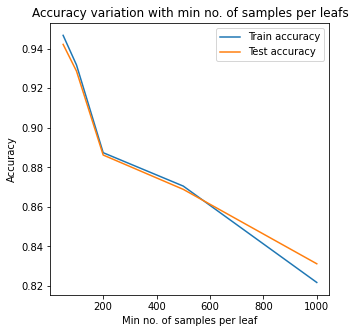

In [131]:
# Experiment with various number of leaf samples

num_samples = [50,100,200,500,1000]

# Please insert your code here
train_acc = list()
test_acc = list()
for i, num in enumerate(num_samples):
    # Step 1 : Create a decision tree classifier with minimum number of samples per leaf (1 point)
    tr = tree.DecisionTreeClassifier(min_samples_leaf=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    tr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(tr.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(tr.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))
 
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_samples, num_samples, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy variation with min no. of samples per leafs", "Min no. of samples per leaf", "Accuracy")

### Comments on the effect of minimum number of samples per leaf node on accuracy (1 point)

---
As we increase the min no. of samples per leaf the training accuracy and test accuracy start to decrease by a tremendous amount. 

The reason is that if we try to fit a lot of data in a leaf node then it is not able to classify the data correctly because of too much differently labelled data being present at the nodes and forcing the leaf nodes to have more samples which are differently classified further reduces it's performance.

## Maximum number of leaf nodes in the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum number of leaf nodes a tree can have. In this section, **comment** on the effect of the various values of the maximum number of  leaf nodes allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

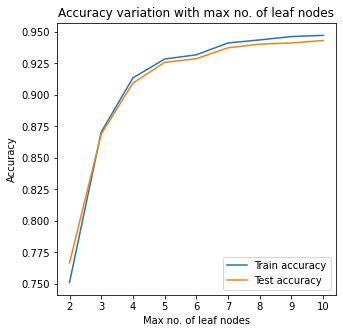

In [132]:
# Experiment with maximum number of leaf nodes

num_leaf_nodes = [i for i in range(2,11)]

# Please insert your code here
train_acc = list()
test_acc = list()

for num in num_leaf_nodes:
    # Step 1 : Create a decision tree classifier with maximum number of leaf nodes (1 point)
    tr = tree.DecisionTreeClassifier(max_leaf_nodes=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    tr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(tr.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(tr.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))
 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_leaf_nodes, num_leaf_nodes, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy variation with max no. of leaf nodes", "Max no. of leaf nodes", "Accuracy")

### Comments on the effect of maximum number of leaf nodes allowed on accuracy (1 point)

---

On increasing the max number of leaf nodes in the tree, we get better training and testing accuracies. The reason is that more the number of leafs available the more diverse classifications we are able to make. If we have more leaf nodes, then our model has more choices to classify the data.

## Maximum depth of the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum depth a tree can grow. In this section, **comment** on the effect of the various values of the maximum tree depth allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

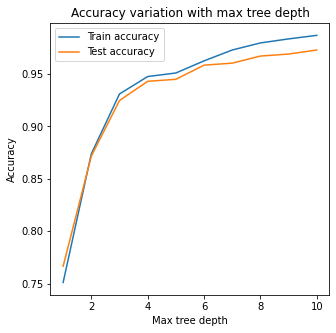

In [133]:
# Experiment with varied tree depths

tree_depths = [i for i in range(1,11)]

# Please insert your code here
train_acc = list()
test_acc = list()

for depth in tree_depths:
    # Step 1 : Create a decision tree classifier with maximum tree depth (1 point)
    tr = tree.DecisionTreeClassifier(max_depth=depth)    
    # Step 2 : Learn the decision tree using the train set (1 point)
    tr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(tr.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))    
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(tr.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(tree_depths, tree_depths, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy variation with max tree depth", "Max tree depth", "Accuracy")

### Comments on the effect of maximum tree depth allowed on accuracy (1 point)

---
On increasing the max tree depth, we get better training and testing accuracies. This is because the deeper the tree is more attributes would be utilisied to classify the data and therefore our model would be able to classify the data and learn better thereby increasing the accuracies.

# Random Forest

---

In this section we will explore the power of ensembles via the Random Forest classifier. We will use the sklearn package's random forest ensemble and study the effect of its hyperparameters on the model performance.

## Instance Bagging


---



To build an ensemble of different trees, a subset of instances are chosen. sklearn provides the flexibility to control the maximum number of instances a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of samples per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---





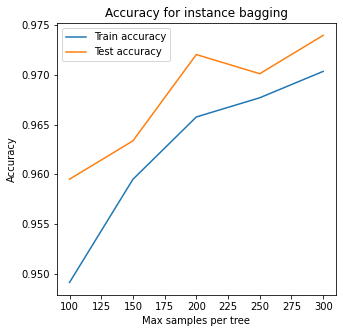

In [134]:
# Instance bagging

num_instances = [100,150,200,250,300]

# Please insert your code here
train_acc = list()
test_acc = list()

for num in num_instances:
    # Step 1 : Create a decision tree classifier with maximum number of instances in a subset (1 point)
    rf = RandomForestClassifier(max_samples=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(rf.score(train_df.iloc[:,:-1], train_df.iloc[:, -1])) 
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(rf.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_instances, num_instances, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy for instance bagging", "Max samples per tree", "Accuracy")

### Comments on the effect of maximum number of instances allowed on accuracy (1 point)

---
Both the train and test accuracies are increasing if we increase the max samples per tree. The simple reason is that more the number of examples available for the training, more will be the accuracy of the learnt model.

## Feature Bagging


---



To build an ensemble of different trees, a subset of features are chosen. sklearn provides the flexibility to control the maximum number of features a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---

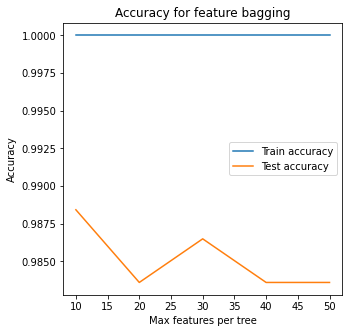

In [135]:
# Feature bagging

num_features = [10,20,30,40,50]

# Please insert your code here
train_acc = list()
test_acc = list()

for num in num_features:
    # Step 1 : Create a decision tree classifier with maximum number of features in a subset (1 point)
    rf = RandomForestClassifier(max_features=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(rf.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(rf.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_features, num_features, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy for feature bagging", "Max features per tree", "Accuracy")

### Comments on the effect of maximum number of features allowed on accuracy (1 point) 

---
The reason for the Train accuracy to be 1 is because maybe the model gets perfect fit using only less than 10 features and even if we increase the number of features used to be greater than 10, we don't see any change in the train accuracy. This simply means that for classification at every node an attribute from a subset of those 10 features is enough and we can classify every input datapoint correctly.

## Number of trees in the ensemble


---
In this section, we will explore the flexibilitity to control the number of decision trees that can be a part of the Random Forest ensemble. **Comment** on the effect of the various values of the number of trees on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---


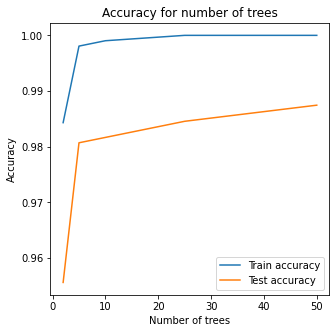

In [136]:
num_trees = [2,5,10,25,50]

# Please insert your code here
train_acc = list()
test_acc = list()

for num in num_trees:
    # Step 1 : Create a decision tree classifier with the given number of trees in an ensemble (1 point)
    rf = RandomForestClassifier(n_estimators=num)
    # Step 2 : Learn the decision tree using the train set (1 point)
    rf.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(rf.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(rf.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(num_trees, num_trees, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy for number of trees", "Number of trees", "Accuracy")

### Comments on the effect of maximum number of trees allowed on accuracy (1 point) 

---
We can see that initially the accuracy increases alot, but after the number of trees become greater than 10, the train and test accuracies pretty much remain the same. This is because when the number of trees becomes sufficiently large their average output remains the same and the average does not change even if we keep on increasing the number of trees thereby accuracy is not affected tha

# Logistic Regression

---

In this section we will apply logistic regression to classify whether malware is present or not. We will experiment with a few hyperparameters that can be flexibly tuned in the sklearn package.

## Effect of regulaization


---
Points for this subsection : **5 points**


---

In the course, we have studied two types of regularization based on the norm applied, namely L1 and L2 regularization. **Comment** on the effect of regularization applied on the accuracy based on suitable plots.



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


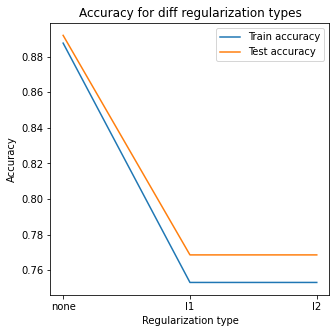

In [137]:
regularization_types = ['none','l1','l2']

# Please insert your code here
train_acc = list()
test_acc = list()

for reg_type in regularization_types:
    # Step 1 : Create a logistic regression classifier with the given regularization type (1 point)
    if (reg_type=='none'):
      lr = LogisticRegression(penalty='none', max_iter=500)
    else:
      lr = LogisticRegression(penalty=reg_type, solver='saga', max_iter=500)
    # Step 2 : Learn the decision tree using the train set (1 point)
    lr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(lr.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(lr.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(regularization_types, regularization_types, train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy for diff regularization types", "Regularization type", "Accuracy")

### Comments on the effect of regularization type on accuracy (1 point) 

---
As we can clearly see that the training and test accuracies for l1 and l2 regularization is less than that without regularization. This is because applying the regularizations will basically prevent the model from overfitting the training dataset and therefore we will get a worse train accuracy.

## Effect of regularization weight


---
sklearn applies L2 regularization on its logistic regression classifier by default. There is a flexibility to tune the weight applied to this regularization term. In this section, **comment** on the effect of different values of the regularization weight parameter on the accuracy as inferred from their plot.


---

Total for this subsection : **5 points**

---






/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


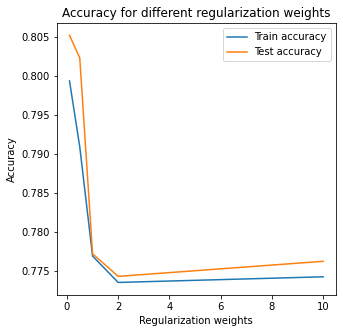

In [139]:
regularization_wts = [0.1,0.5,1,2,10]

# Please insert your code here
train_acc = list()
test_acc = list()

for wt in regularization_wts:
    # Step 1 : Create a logistic regression classifier with the given regularization weight (1 point)
    lr = LogisticRegression(C=1/wt)
    # Step 2 : Learn the decision tree using the train set (1 point)
    lr.fit(train_df.iloc[:,:-1], train_df.iloc[:, -1])
    # Step 3 : Compute train accuracy in % (0.5 points)
    train_acc.append(lr.score(train_df.iloc[:,:-1], train_df.iloc[:, -1]))
    # Step 4 : Compute test accuracy in % (0.5 points)
    test_acc.append(lr.score(test_df.iloc[:,:-1], test_df.iloc[:, -1]))

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
generate_line_plots(np.reciprocal(regularization_wts), np.reciprocal(regularization_wts), train_acc, test_acc, "Train accuracy", "Test accuracy", "Accuracy for different regularization weights", "Regularization weights", "Accuracy")

### Comments on the effect of regularization weights on accuracy (1 point) 

---
As also observed from the previous part that if we do regularization then in order to prevent our model from overfitting the dataset our model penalizes greater weight values and thereby decreasing the accuracies. The same happens here as we can interpret increasing the regularization weights as increasing regularization and as discussed above we know that increasing regularization will decrease the accuracies.